# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
kc_house_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\kc_house_data.csv")
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
kc_house_data.shape

(21613, 21)

# To change the data column into year

In [4]:
kc_house_data["date"] = kc_house_data["date"].apply(lambda x:x[:4]).astype("int64")

In [5]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Feature Engineering

In [6]:
kc_house_data["build_age"] = kc_house_data["date"] - kc_house_data["yr_built"]

In [7]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,build_age
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [8]:
kc_house_data.shape

(21613, 22)

# Selected columns

In [9]:
kc_house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'build_age'],
      dtype='object')

In [10]:
columns1 = ["yr_built","build_age","sqft_living","sqft_lot","id","sqft_above","sqft_lot15","waterfront","yr_renovated"]

In [11]:
columns =['date', 'bedrooms', 'bathrooms', 'sqft_living',
        'floors', 'view', 'condition', 'grade','lat', 'long', 'sqft_living15']
len(columns)

11

# Create a dataFrame with selected columns

In [12]:
dataFrame = pd.DataFrame(kc_house_data[columns])
dataFrame["price"] = kc_house_data["price"]
dataFrame.head()

,date,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,lat,long,sqft_living15,price
0,2014,3,1.00,1180,1.0,0,3,7,47.5112,-122.257,1340,221900.0
1,2014,3,2.25,2570,2.0,0,3,7,47.7210,-122.319,1690,538000.0
2,2015,2,1.00,770,1.0,0,3,6,47.7379,-122.233,2720,180000.0
3,2014,4,3.00,1960,1.0,0,5,7,47.5208,-122.393,1360,604000.0
4,2015,3,2.00,1680,1.0,0,3,8,47.6168,-122.045,1800,510000.0


# Descriptive Statistics

In [13]:
dataFrame.describe()

,date,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,lat,long,sqft_living15,price
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2014.322954,3.370842,2.114757,2079.899736,1.494309,0.234303,3.409430,7.656873,47.560053,-122.213896,1986.552492,5.400881e+05
std,0.467616,0.930062,0.770163,918.440897,0.539989,0.766318,0.650743,1.175459,0.138564,0.140828,685.391304,3.671272e+05
min,2014.000000,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,1.000000,47.155900,-122.519000,399.000000,7.500000e+04
25%,2014.000000,3.000000,1.750000,1427.000000,1.000000,0.000000,3.000000,7.000000,47.471000,-122.328000,1490.000000,3.219500e+05
50%,2014.000000,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,47.571800,-122.230000,1840.000000,4.500000e+05
75%,2015.000000,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,47.678000,-122.125000,2360.000000,6.450000e+05
max,2015.000000,33.000000,8.000000,13540.000000,3.500000,4.000000,5.000000,13.000000,47.777600,-121.315000,6210.000000,7.700000e+06


# Display the Complete Meta-Data of the dataset

In [14]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   view           21613 non-null  int64  
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   lat            21613 non-null  float64
 9   long           21613 non-null  float64
 10  sqft_living15  21613 non-null  int64  
 11  price          21613 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


# Handling Duplicates¶

In [15]:
dataFrame.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [16]:
droped_dataFrame = dataFrame.drop_duplicates()
droped_dataFrame.head()

,date,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,lat,long,sqft_living15,price
0,2014,3,1.00,1180,1.0,0,3,7,47.5112,-122.257,1340,221900.0
1,2014,3,2.25,2570,2.0,0,3,7,47.7210,-122.319,1690,538000.0
2,2015,2,1.00,770,1.0,0,3,6,47.7379,-122.233,2720,180000.0
3,2014,4,3.00,1960,1.0,0,5,7,47.5208,-122.393,1360,604000.0
4,2015,3,2.00,1680,1.0,0,3,8,47.6168,-122.045,1800,510000.0


In [17]:
droped_dataFrame.shape

(21603, 12)

# Outliers

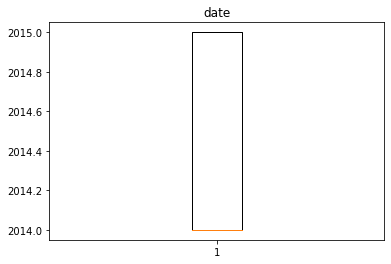

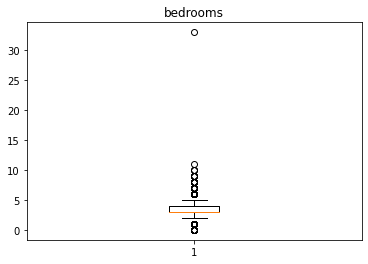

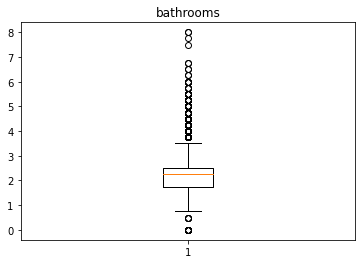

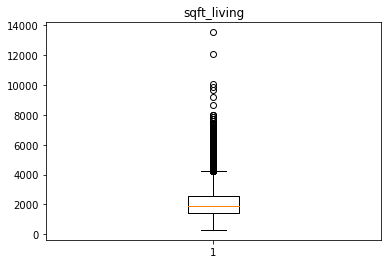

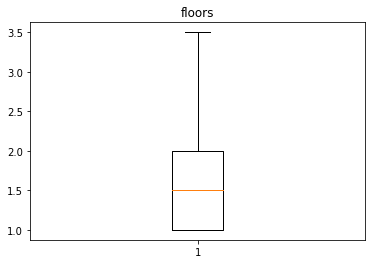

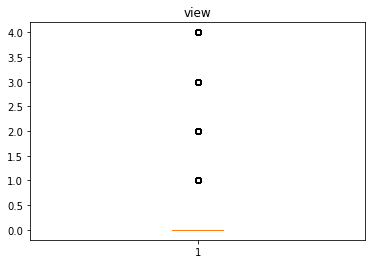

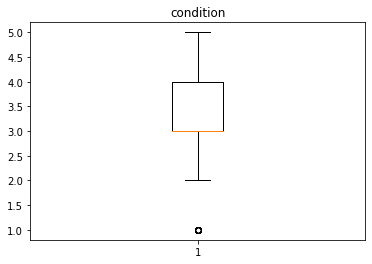

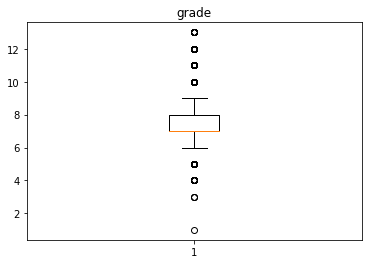

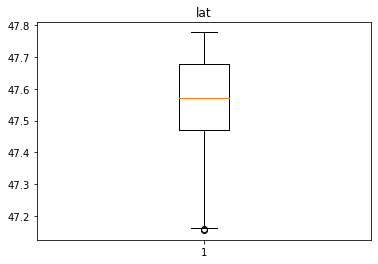

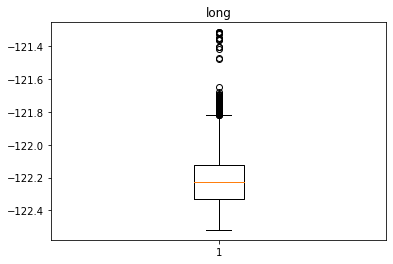

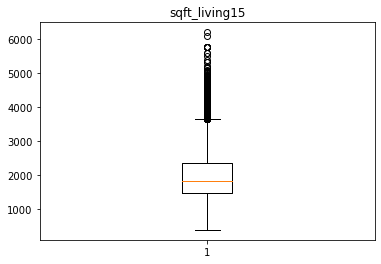

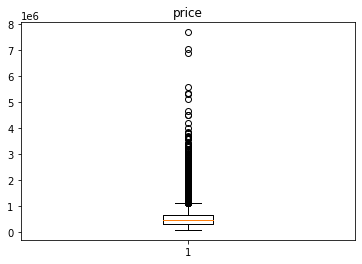

In [18]:
for col in droped_dataFrame.columns:
    plt.boxplot(droped_dataFrame[col])
    plt.title(col)
    plt.show()

# Handling Missing Values

In [19]:
droped_dataFrame.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
view             0
condition        0
grade            0
lat              0
long             0
sqft_living15    0
price            0
dtype: int64

# Univariate Analysis

# Histogram Plot

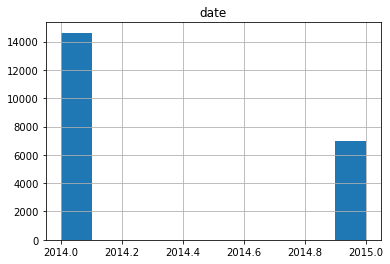

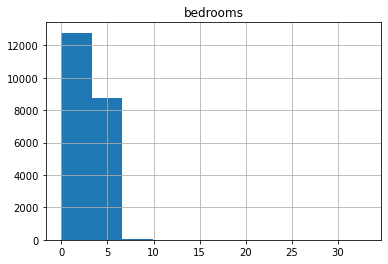

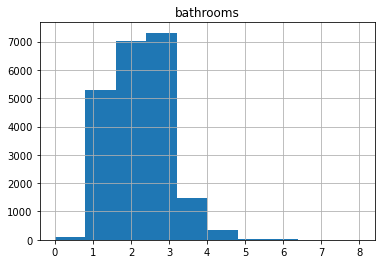

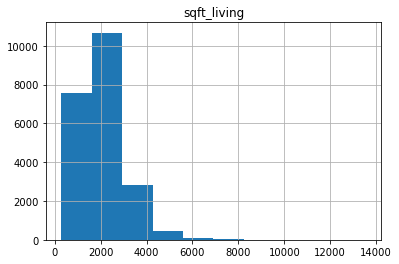

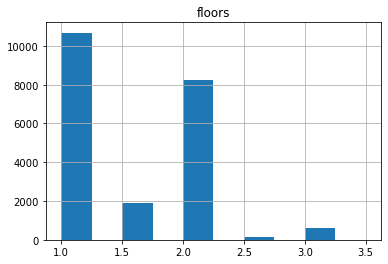

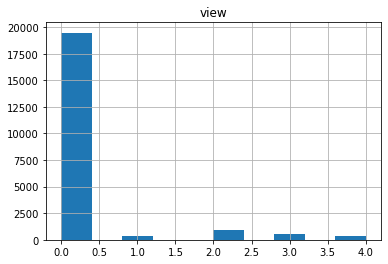

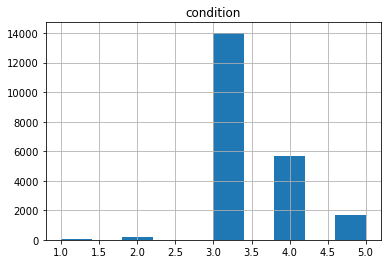

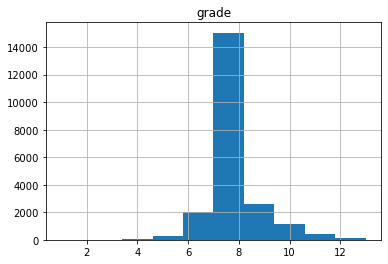

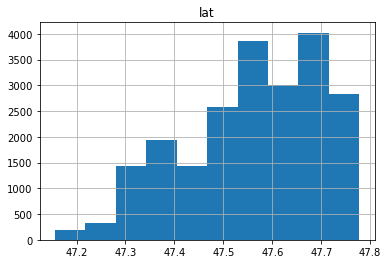

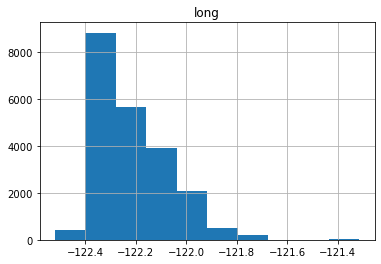

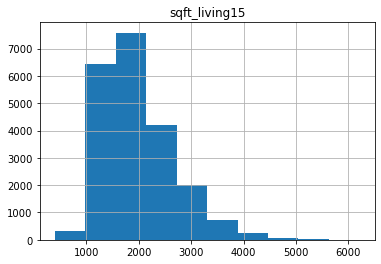

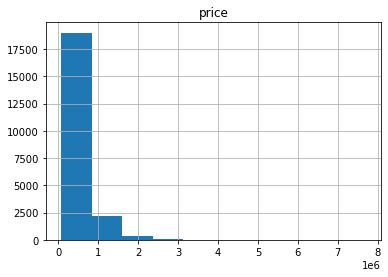

In [20]:
for col in droped_dataFrame.columns:
    droped_dataFrame[col].hist()
    plt.title(col)
    plt.show()

# Bivariate Analysis

# Scatter Plot

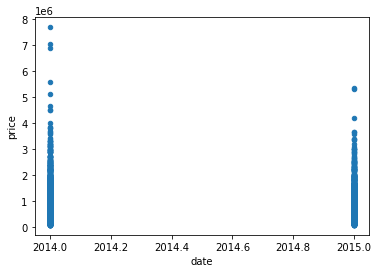

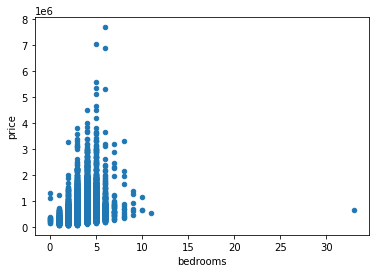

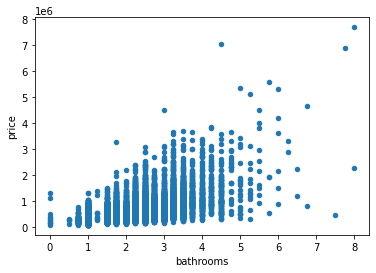

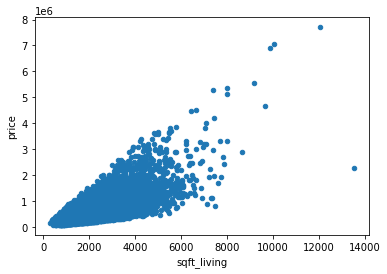

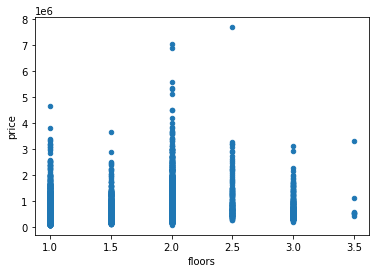

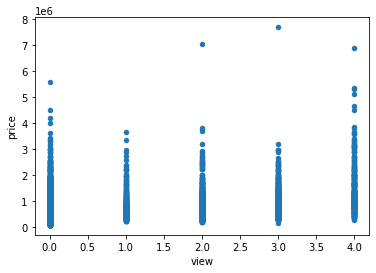

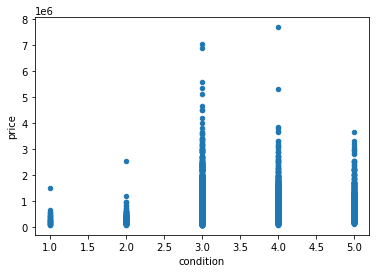

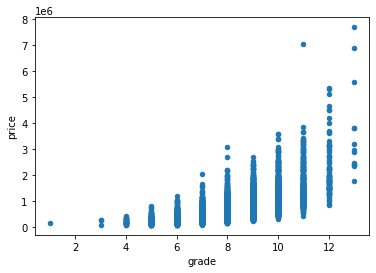

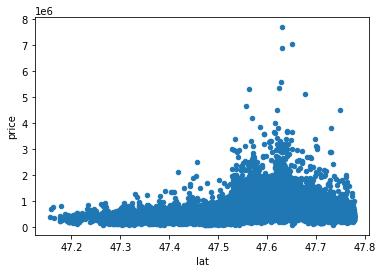

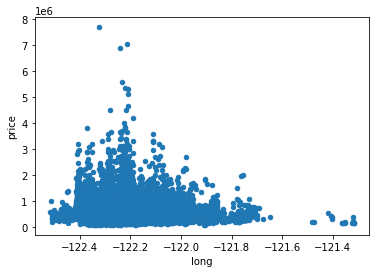

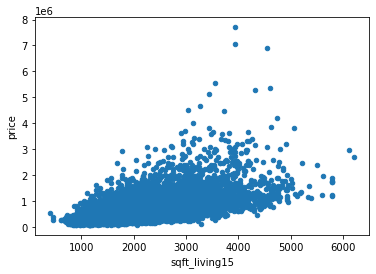

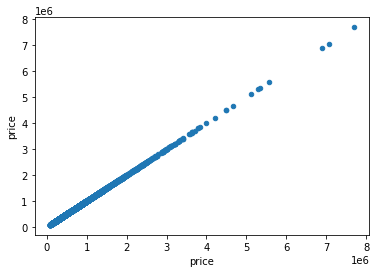

In [21]:
for col in droped_dataFrame.columns:
    dataFrame.plot(x=col,y="price",kind = 'scatter')
    plt.show()

# Correlation Matrix

In [22]:
droped_dataFrame.corr()

,date,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,lat,long,sqft_living15,price
date,1.000000,-0.009814,-0.026645,-0.029023,-0.022434,0.001651,-0.045428,-0.030644,-0.029175,0.000428,-0.021670,0.003564
bedrooms,-0.009814,1.000000,0.515963,0.576534,0.175761,0.079503,0.028572,0.357085,-0.008885,0.129252,0.391455,0.308281
bathrooms,-0.026645,0.515963,1.000000,0.754800,0.500813,0.187911,-0.124681,0.665021,0.024593,0.223170,0.568806,0.525190
sqft_living,-0.029023,0.576534,0.754800,1.000000,0.354434,0.284877,-0.058657,0.762940,0.052610,0.240041,0.756367,0.702053
floors,-0.022434,0.175761,0.500813,0.354434,1.000000,0.028800,-0.263645,0.458122,0.049456,0.125916,0.280331,0.256953
view,0.001651,0.079503,0.187911,0.284877,0.028800,1.000000,0.046027,0.251498,0.005897,-0.078488,0.280633,0.397597
condition,-0.045428,0.028572,-0.124681,-0.058657,-0.263645,0.046027,1.000000,-0.144426,-0.014981,-0.106643,-0.092860,0.036450
grade,-0.030644,0.357085,0.665021,0.762940,0.458122,0.251498,-0.144426,1.000000,0.114090,0.198584,0.713472,0.667534
lat,-0.029175,-0.008885,0.024593,0.052610,0.049456,0.005897,-0.014981,0.114090,1.000000,-0.135481,0.048907,0.307026
long,0.000428,0.129252,0.223170,0.240041,0.125916,-0.078488,-0.106643,0.198584,-0.135481,1.000000,0.334428,0.021548


# Heat map

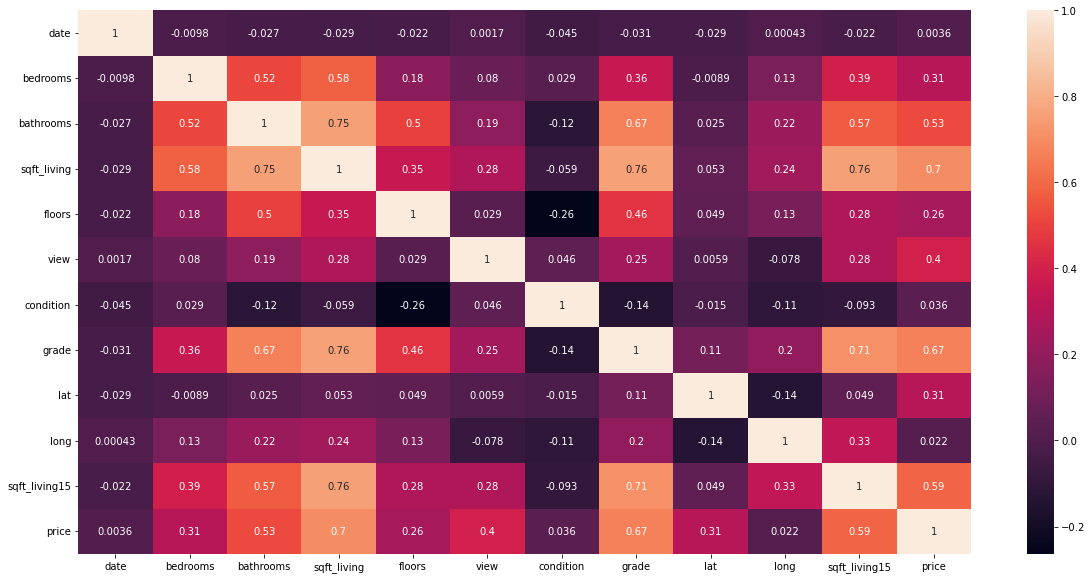

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(droped_dataFrame.corr(),annot=True)
plt.show()

# Handling Outliners

In [24]:
for col in droped_dataFrame.columns:
    p0 = droped_dataFrame[col].min()
    p100 = droped_dataFrame[col].max()
    q1 = droped_dataFrame[col].quantile(0.05)
    q3 = droped_dataFrame[col].quantile(0.95)
    droped_dataFrame[col].clip(upper=q3,lower=q1,inplace=True)

C:\Users\kd67152\AppData\Local\Temp\ipykernel_28168\217895033.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataFrame[col].clip(upper=q3,lower=q1,inplace=True)


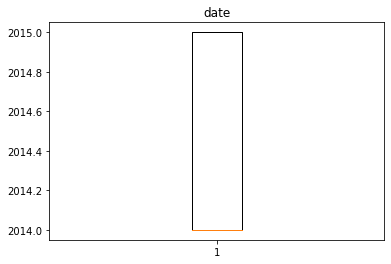

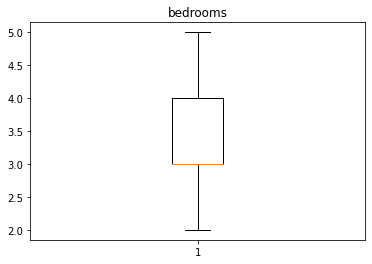

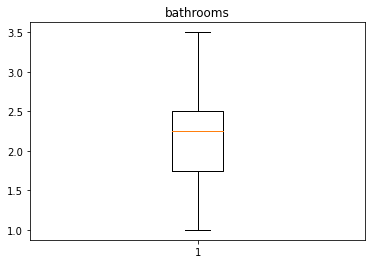

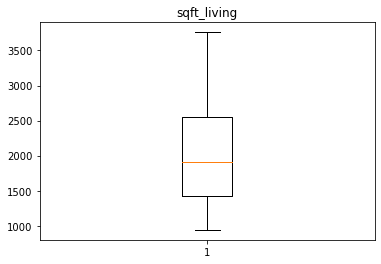

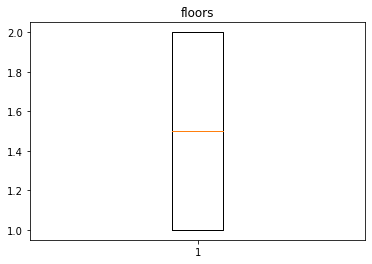

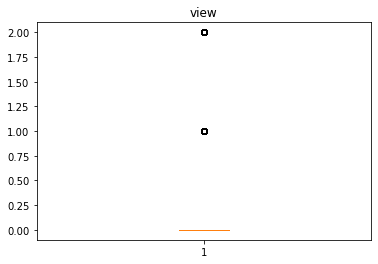

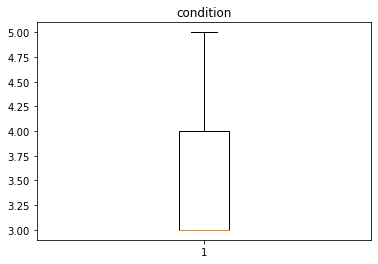

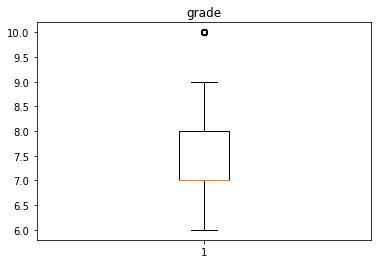

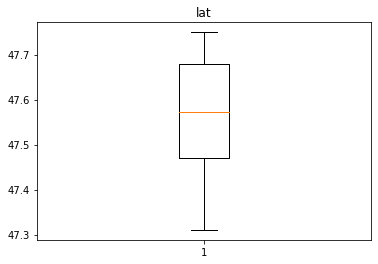

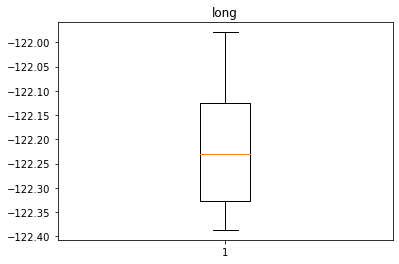

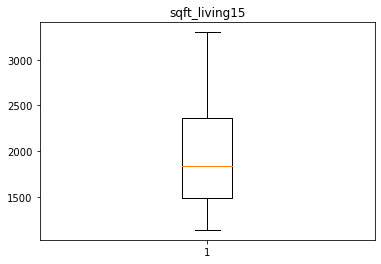

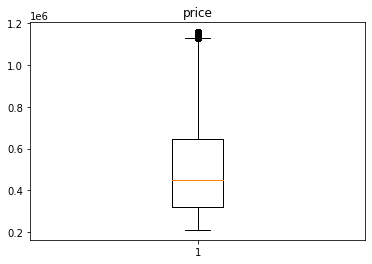

In [25]:
for col in droped_dataFrame.columns:
    plt.boxplot(droped_dataFrame[col])
    plt.title(col)
    plt.show()

In [26]:
X = droped_dataFrame.drop(["price"],axis=1)
y = droped_dataFrame["price"]

# LinearRegression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test,y_train,y_test = train_test_split(X,y ,random_state=0)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.score(X_test,y_test)

0.7252504629987644

# Coefficient

In [32]:
from sklearn.linear_model import Lasso

In [33]:
ls=Lasso(alpha=0.01,max_iter=2000)
ls.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=2000)

          weights        columns
9  -173953.674756           long
1   -10955.916708       bedrooms
2    -4657.459487      bathrooms
10      51.643255  sqft_living15
3      113.754883    sqft_living
4     7502.893764         floors
0    22749.064178           date
6    48448.051464      condition
5    58994.214255           view
7    78474.256883          grade
8   617811.710792            lat


<BarContainer object of 11 artists>

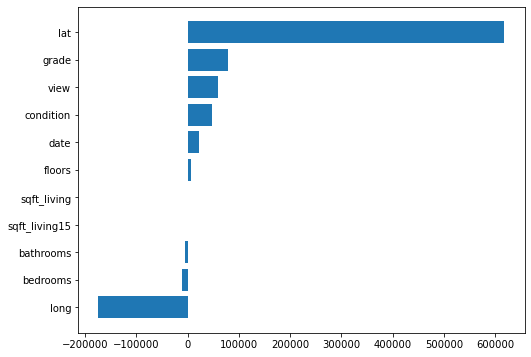

In [34]:
coef=pd.DataFrame(ls.coef_,columns=["weights"])
colmn=pd.DataFrame(X_train.columns,columns=["columns"])
importances=pd.concat([coef,colmn],axis=1)
importances.sort_values("weights",ascending=True,inplace=True)
print(importances)
plt.figure(figsize=(8,6))
plt.barh(importances["columns"],width=importances["weights"])

# P-value

In [35]:
from scipy import stats

In [36]:
corr_df = pd.DataFrame(columns=["Feature","corr","p_value"])

for col in droped_dataFrame.columns:
    if col == "price":
        continue
    else:
        corr,p_value = stats.pearsonr(droped_dataFrame["price"],droped_dataFrame[col])
        corr_df.loc[len(corr_df)] = [col,corr,p_value]
    
corr_df

,Feature,corr,p_value
0,date,0.003434,6.137631e-01
1,bedrooms,0.349257,0.000000e+00
2,bathrooms,0.519583,0.000000e+00
3,sqft_living,0.691933,0.000000e+00
4,floors,0.316747,0.000000e+00
5,view,0.345046,0.000000e+00
6,condition,0.029632,1.324624e-05
7,grade,0.699636,0.000000e+00
8,lat,0.400407,0.000000e+00
9,long,0.060968,2.996598e-19


# Variance Inflation Factor(VIF)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif_data = pd.DataFrame()
vif_data["feature"] = droped_dataFrame.columns

vif_data["VIF"] = [variance_inflation_factor(droped_dataFrame.values, i)
                          for i in range(len(droped_dataFrame.columns))]

In [39]:
vif_data

,feature,VIF
0,date,1.234436e+06
1,bedrooms,3.065401e+01
2,bathrooms,2.662590e+01
3,sqft_living,4.052691e+01
4,floors,1.684997e+01
5,view,1.348760e+00
6,condition,3.506061e+01
7,grade,1.778295e+02
8,lat,1.793079e+05
9,long,1.142710e+06
